In [1]:
from models import utils
from data_utils import *
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

import itertools
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

from models.multivariate_gaussian import MultiGauss
from models.SVM import SVM
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal',
          'pop', 'reggae', 'rock']

In [2]:
df = pd.read_hdf("data/features_dataset_WS16384.h5")
df = df[np.isfinite(df['centroid'])]
MFCC_FEATURES_N = 12
CHROMA_N = 12
predictor_var = ["centroid","rolloff","zcr"]
for feature in ['mfcc{}'.format(feature_j) for feature_j in range(MFCC_FEATURES_N)]:
    predictor_var.append(feature)
for feature in ['chroma{}'.format(feature_j) for feature_j in range(CHROMA_N)]:
    predictor_var.append(feature)

In [19]:
dfa , dfb, dfc = utils.get_partitions_2(df,train_per=0.6, cross_per=0.2, test_per=0.2)
model = MultiGauss(predictor_var)
model.fit(dfa)

In [20]:
orig, pred = model.predict_df(dfb)
print metrics.classification_report(orig['genre'],pred['genre'],target_names=GENRES)

             precision    recall  f1-score   support

      blues       0.56      0.50      0.53        20
  classical       0.87      1.00      0.93        20
    country       0.58      0.55      0.56        20
      disco       0.53      0.50      0.51        20
     hiphop       0.75      0.75      0.75        20
       jazz       0.58      0.70      0.64        20
      metal       0.90      0.90      0.90        20
        pop       0.62      0.75      0.68        20
     reggae       0.71      0.50      0.59        20
       rock       0.47      0.45      0.46        20

avg / total       0.66      0.66      0.66       200



In [22]:
conf_arr = metrics.confusion_matrix(orig['genre'], pred['genre'])

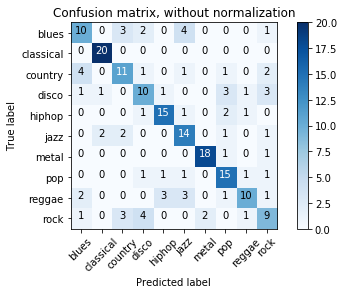

In [24]:
np.set_printoptions(precision=2)

plt.figure()
utils.plot_confusion_matrix(conf_arr, classes=GENRES,
                      title='Confusion matrix, without normalization')

plt.show()